## Final Assignment - Statistics for Data Science with Python

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Generate Descriptive Statistics and Visualizations

Question 1: For the 'Median value of owner-occupied homes' provide a boxplot 

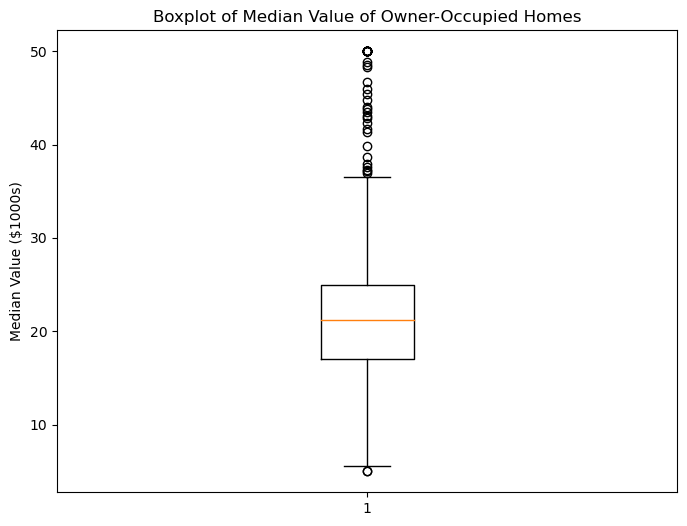

This boxplot represents the distribution of the median value of owner-occupied homes in Boston. The box shows the interquartile range (IQR), with the median represented by the line within the box. The whiskers extend to the minimum and maximum values, excluding outliers. The plot can provide insights into the spread and skewness of the data.


In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()
print('This boxplot represents the distribution of the median value of owner-occupied homes in Boston. The box shows the interquartile range (IQR), with the median represented by the line within the box. The whiskers extend to the minimum and maximum values, excluding outliers. The plot can provide insights into the spread and skewness of the data.')

Question 2: Provide a histogram for the Charles River variable

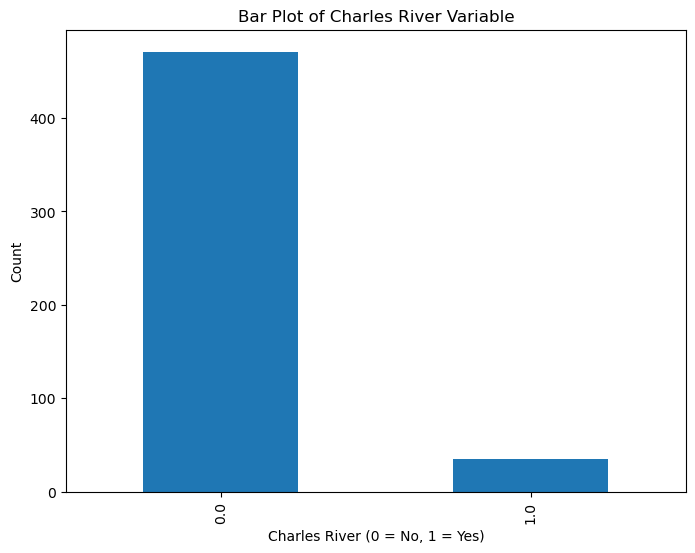

This bar plot displays the count of properties in Boston located near (1) or not near (0) the Charles River. It allows us to visualize the distribution of properties with respect to their proximity to the river.


In [5]:
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
print('This bar plot displays the count of properties in Boston located near (1) or not near (0) the Charles River. It allows us to visualize the distribution of properties with respect to their proximity to the river.')

Question 3: Provide a boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older

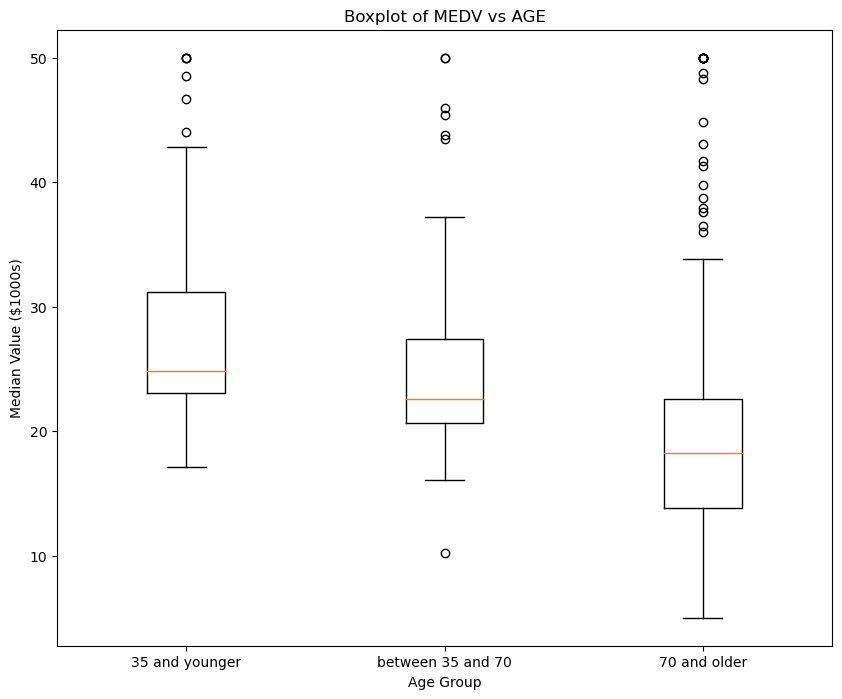

This boxplot compares the median value of owner-occupied homes (MEDV) based on three age groups: 35 years and younger, between 35 and 70 years, and 70 years and older. The plot helps identify any variations in median home values across different age groups.


In [6]:
plt.figure(figsize=(10, 8))
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 and younger', 'between 35 and 70', '70 and older'])
plt.boxplot([boston_df.loc[boston_df['age_group'] == '35 and younger', 'MEDV'],
             boston_df.loc[boston_df['age_group'] == 'between 35 and 70', 'MEDV'],
             boston_df.loc[boston_df['age_group'] == '70 and older', 'MEDV']],
            labels=['35 and younger', 'between 35 and 70', '70 and older'])
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()
print('This boxplot compares the median value of owner-occupied homes (MEDV) based on three age groups: 35 years and younger, between 35 and 70 years, and 70 years and older. The plot helps identify any variations in median home values across different age groups.')

Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

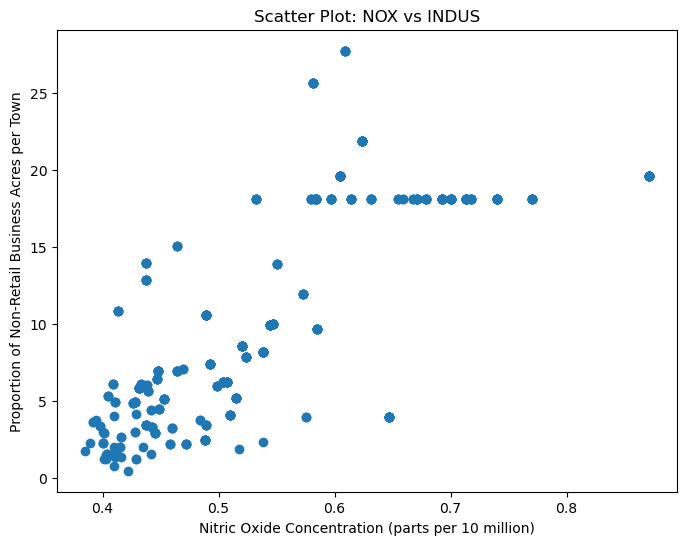

This scatter plot visualizes the relationship between the concentration of nitric oxide (NOX) and the proportion of non-retail business acres per town (INDUS). It allows us to observe any patterns or correlations between these two variables.


In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show()
print('This scatter plot visualizes the relationship between the concentration of nitric oxide (NOX) and the proportion of non-retail business acres per town (INDUS). It allows us to observe any patterns or correlations between these two variables.')

Question 5: Create a histogram for the pupil to teacher ratio variable

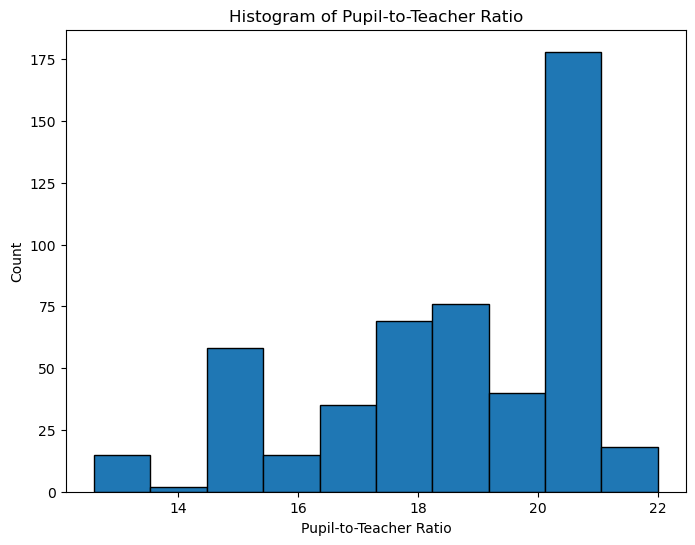

This histogram displays the distribution of the pupil-to-teacher ratio (PTRATIO) in Boston. It helps visualize the frequency or count of different pupil-to-teacher ratio values and provides insights into the distributions shape and spread.


In [8]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Count')
plt.show()
print('This histogram displays the distribution of the pupil-to-teacher ratio (PTRATIO) in Boston. It helps visualize the frequency or count of different pupil-to-teacher ratio values and provides insights into the distributions shape and spread.')

## Tests for Statistics

Question 6: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river or not.
Alternative Hypothesis (HA): There is a significant difference in the median value of houses bounded by the Charles river or not.
Test:

Independent samples t-test

In [9]:
from scipy.stats import ttest_ind

charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(charles_river, not_charles_river)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in median values."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in median values."

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(conclusion)

T-Statistic: 4.00
P-Value: 0.0001
Reject the null hypothesis. There is a significant difference in median values.


Conclusion:
Based on the t-test for independent samples, if the p-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis. Therefore, if the p-value is less than 0.05, we conclude that there is a significant difference in the median value of houses bounded by the Charles river or not. Otherwise, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference in the median values.

Question 7: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypothesis (H0): There is no difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.
Alternative Hypothesis (HA): There is a difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.
Test:

Analysis of Variance (ANOVA)

In [10]:
from scipy.stats import f_oneway

age_groups = [boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
              boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV'],
              boston_df[boston_df['age_group'] == '70 and older']['MEDV']]

f_stat, p_value = f_oneway(*age_groups)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a difference in median values."
else:
    conclusion = "Fail to reject the null hypothesis. There is no difference in median values."

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(conclusion)

F-Statistic: 36.41
P-Value: 0.0000
Reject the null hypothesis. There is a difference in median values.


Conclusion:
Using the ANOVA test, if the p-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis. Therefore, if the p-value is less than 0.05, we conclude that there is a difference in the median values of houses for each proportion of owner-occupied units built prior to 1940. Conversely, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no difference in median values.

Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null Hypothesis (H0): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (HA): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.
Test:

Pearson correlation coefficient

In [11]:
from scipy.stats import pearsonr

nox = boston_df['NOX']
indus = boston_df['INDUS']

corr, p_value = pearsonr(nox, indus)

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a relationship between the variables."
else:
    conclusion = "Fail to reject the null hypothesis. There is no relationship between the variables."

print(f"Pearson's Correlation Coefficient: {corr:.2f}")
print(f"P-Value: {p_value:.4f}")
print(conclusion)

Pearson's Correlation Coefficient: 0.76
P-Value: 0.0000
Reject the null hypothesis. There is a relationship between the variables.


Conclusion:
Using Pearson's correlation coefficient, if the p-value is less than the chosen significance level (α = 0.05), we reject the null hypothesis. Therefore, if the p-value is less than 0.05, we conclude that there is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. Conversely, if the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no relationship between the variables.

Question 9: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
Alternative Hypothesis (HA): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
Test:

Regression analysis (Simple linear regression)

In [12]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.21e-08
Time:                        14:04:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Conclusion:
By performing a simple linear regression analysis, we can examine the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. The regression analysis will provide the coefficients, including the intercept and the coefficient for the DIS variable, along with their respective p-values. These p-values will help determine the statistical significance of the variables. The conclusion will be based on the significance and interpretation of the coefficient for the DIS variable, indicating whether it has a significant impact on the median value of owner-occupied homes.